# IPL Dataset 

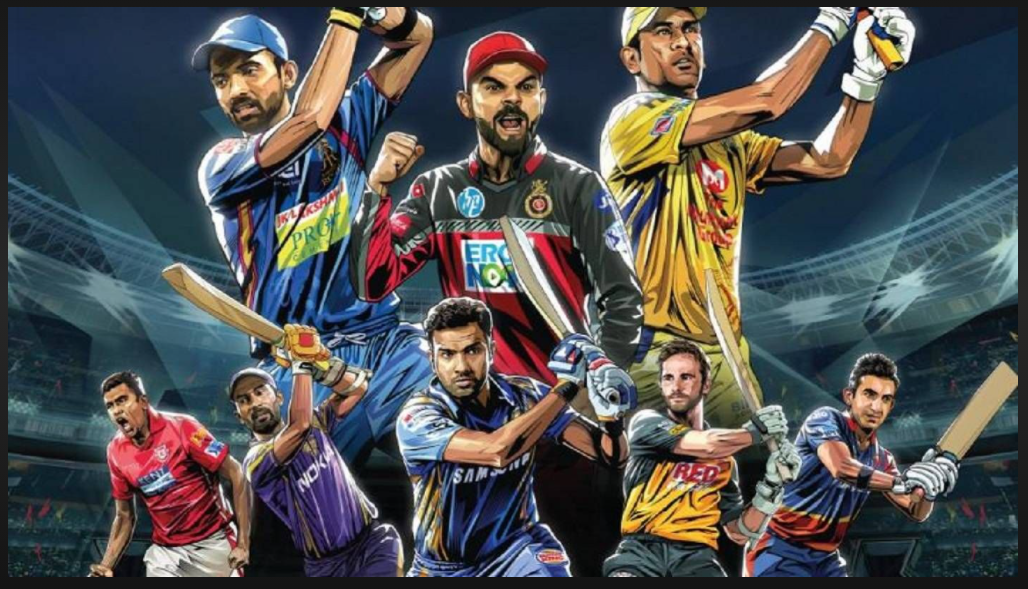

The Indian Premier League ( IPL) is a professional Twenty20 cricket league, contested by eight teams based out of eight different Indian cities. The league was founded by the Board of Control for Cricket in India (BCCI) in 2007. It is usually held between March and May of every year and has an exclusive window in the ICC Future Tours Programme.

I am going to analyze data from the IPL's past seasons, I have done this analysis from a historical point of view, giving an overview of what has happened in the IPL over the years. I have used tools such as Pandas, Matplotlib along with Python to give a visual as well as numeric representation of the data in front of us.

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
!pip install openpyxl --quiet
from matplotlib import style
style.use('dark_background')

# loading datasets

In [4]:
missing_val='?'

match_data=pd.read_csv('C:/Users/ANUVA/Downloads/data/matches.csv',na_values=missing_val)

home_away_data=pd.read_csv('C:/Users/ANUVA/Downloads/data/teamwise_home_and_away.csv',na_values=missing_val)

deliveries_data=pd.read_csv('C:/Users/ANUVA/Downloads/data/deliveries.csv',na_values=missing_val)

runs_data=pd.read_csv('C:/Users/ANUVA/Downloads/data/most_runs_average_strikerate.csv',na_values=missing_val)

teams_data=pd.read_csv('C:/Users/ANUVA/Downloads/data/teams.csv',na_values=missing_val) 

Players_data=pd.read_excel('C:/Users/ANUVA/Downloads/data/Players.xlsx',na_values=missing_val)

# Exploratory Data Analysis:-

# <h2>Teams dataset:-</h2>

In [17]:
df=teams_data['team1']
df

0                   Pune Warriors
1           Kolkata Knight Riders
2                Rajasthan Royals
3            Kochi Tuskers Kerala
4                   Gujarat Lions
5             Chennai Super Kings
6         Rising Pune Supergiants
7                Delhi Daredevils
8                 Deccan Chargers
9                  Delhi Capitals
10                 Mumbai Indians
11            Sunrisers Hyderabad
12         Rising Pune Supergiant
13    Royal Challengers Bangalore
14                Kings XI Punjab
Name: team1, dtype: object

<h4>Total number of teams playing IPL</h4>

In [20]:
len(df.value_counts())

15

# <h2>Deliviery dataset:-</h2>

In [8]:
deliveries_data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [60]:
#Handling missing values
deliveries_data.fillna(0,inplace=True)     #filling all the NaN values with 0

<h4>dismissed_players</h4>

In [24]:
dismissed_players = deliveries_data.player_dismissed.value_counts()[:10]
dismissed_players

SK Raina      162
RG Sharma     155
RV Uthappa    153
V Kohli       143
S Dhawan      137
G Gambhir     136
KD Karthik    135
PA Patel      126
AM Rahane     116
AT Rayudu     115
Name: player_dismissed, dtype: int64

<h4>Team who made max number of 4 and 6</h4>

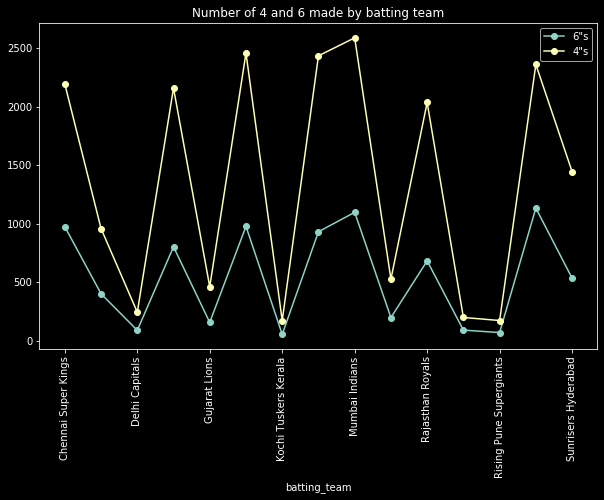

In [9]:
z=deliveries_data.groupby("batting_team")["batsman_runs"].agg(lambda x: (x==6).sum()).reset_index()
y=deliveries_data.groupby("batting_team")["batsman_runs"].agg(lambda x: (x==4).sum()).reset_index()
z=z.merge(y,left_on='batting_team',right_on='batting_team',how='left')
z=z.rename(columns={'batsman_runs_x':'6"s','batsman_runs_y':'4"s'})
z.set_index('batting_team')[['6"s','4"s']].plot(marker='o')
fig=plt.gcf()
plt.xticks(rotation=90)
fig.set_size_inches(10,6)
plt.title('Number of 4 and 6 made by batting team')
plt.show()

<h3>Observations:</h3>
<ul> 
    <li>Through above plot, we know that the number of 4's are more than 6's.</li>
    <li>the max number of 4's were from Mumbai Indians as well as the max number of 6's.</li>
    
</ul>

<h4>Number of wide balls by different bowling teams</h4>

Text(0.5, 1.0, 'Number of wide balls by different bowling teams')

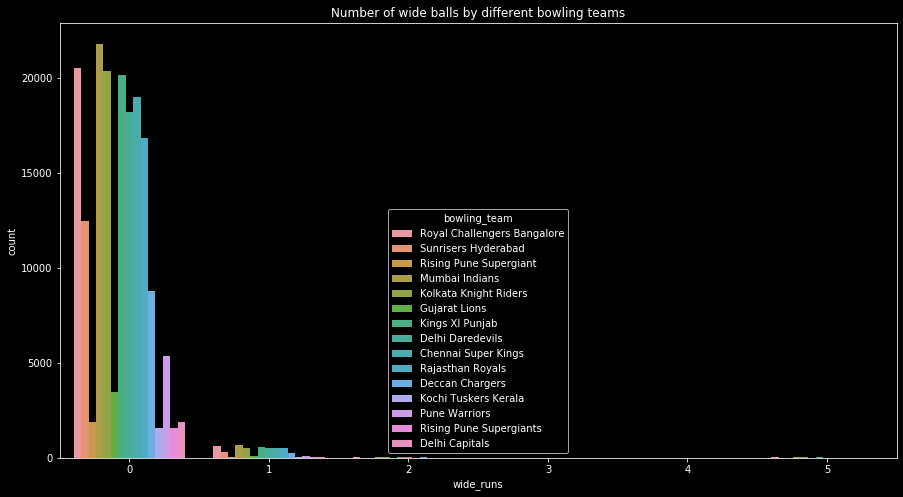

In [15]:
plt.figure(figsize=[15,8])
sns.countplot(x='wide_runs' ,hue='bowling_team', data=deliveries_data )
plt.title('Number of wide balls by different bowling teams')

<h3>Observations:</h3>
<ul> 
    <li>Most of the team give 0 wide ball runs to the batting team in any match.</li>
    <li>Mumbai Indians has highest count of giving 0 runs on wide ball.</li>
    
</ul>

<h4>PURPLE CAP</h4>
<h4>Bowler who took Maximum wickets</h4>

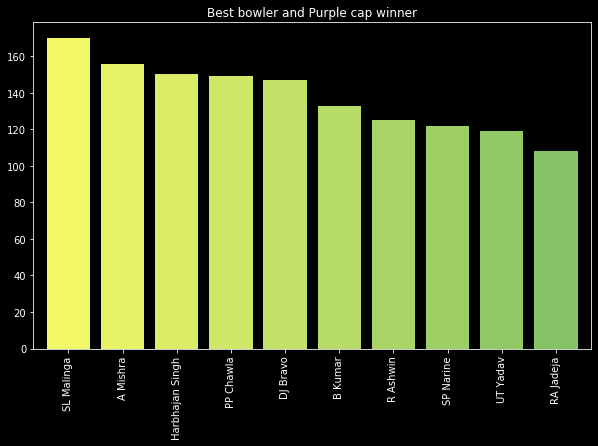

In [13]:
#purple cap
plt.subplots(figsize=(10,6))
dismissal_kinds = ["bowled", "caught", "lbw", "stumped", "caught and bowled", "hit wicket"]  
ct=deliveries_data[deliveries_data["dismissal_kind"].isin(dismissal_kinds)]
ax=ct['bowler'].value_counts()[:10].plot.bar(width=0.8,color=sns.color_palette('summer_r',20))
plt.title('Best bowler and Purple cap winner')
plt.show()

<h3>Observations:</h3>
<ul>  
    <li>The best bowler was SL Malinga throughout    # purple cap</li>
    
</ul>

# <h2>Players dataset:-</h2>

In [46]:
Players_data.head()

,Player_Name,DOB,Batting_Hand,Bowling_Skill,Country
0,A Ashish Reddy,1991-02-24,Right_Hand,Right-arm medium,India
1,A Chandila,1983-12-05,Right_Hand,Right-arm offbreak,India
2,A Chopra,1977-09-19,Right_Hand,Right-arm offbreak,India
3,A Choudhary,NaT,Right_Hand,Left-arm fast-medium,NaN
4,A Dananjaya,NaT,Right_Hand,Right-arm offbreak,NaN


In [55]:
#missing value handling
Players_data['Bowling_Skill'].fillna(Players_data['Bowling_Skill'].mode(), inplace=True)

In [8]:
#Dropping DOB col cause its not needed
Players_data=Players_data.drop(['DOB'],axis=1)

<h4>Types of bowlers in the tournament</h4>

Text(0.5, 1.0, 'Types of bowlers in the tournament ')

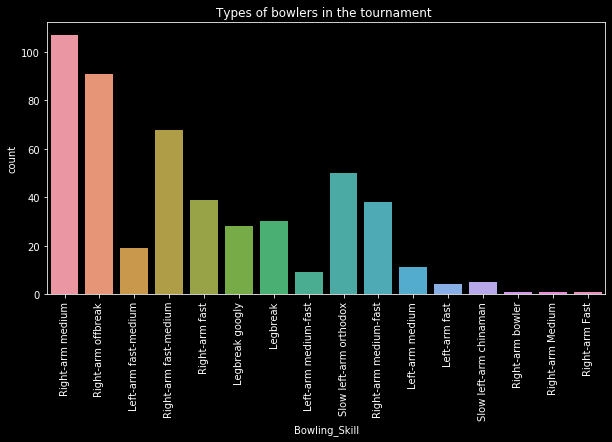

In [54]:
plt.figure(figsize=[10,5])
plt.xticks(rotation=90)
sns.countplot(x='Bowling_Skill', data=Players_data )
plt.title('Types of bowlers in the tournament ')


<h3>Observations:</h3>
<ul>  
    <li>Between 2008-17 the tournament had max number of right arm medium bowlers and right arm fast were the least</li>
    
</ul>

<h4>To find max players batting hand</h4>

Text(0.5, 1.0, 'players batting hand')

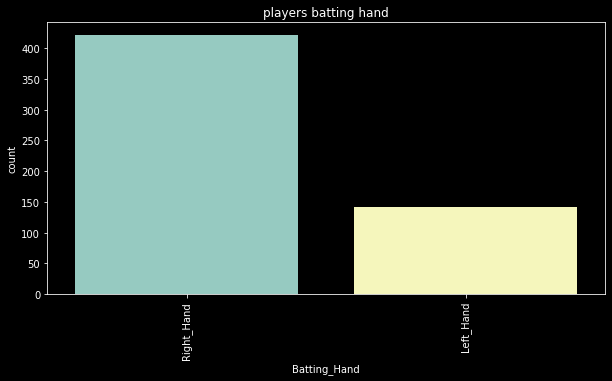

In [50]:
plt.figure(figsize=[10,5])
plt.xticks(rotation=90)
sns.countplot(x='Batting_Hand', data=Players_data )
plt.title('players batting hand')


<h3>Observations:</h3>
<ul>  
    <li>More than 50% of the batsmen who took part in the tournament between 2008-17 were Right Handy</li>
    
</ul>

<h4>To find types of bowlers in different countries</h4>

Text(0.5, 1.0, 'Types of bowlers in different countries')

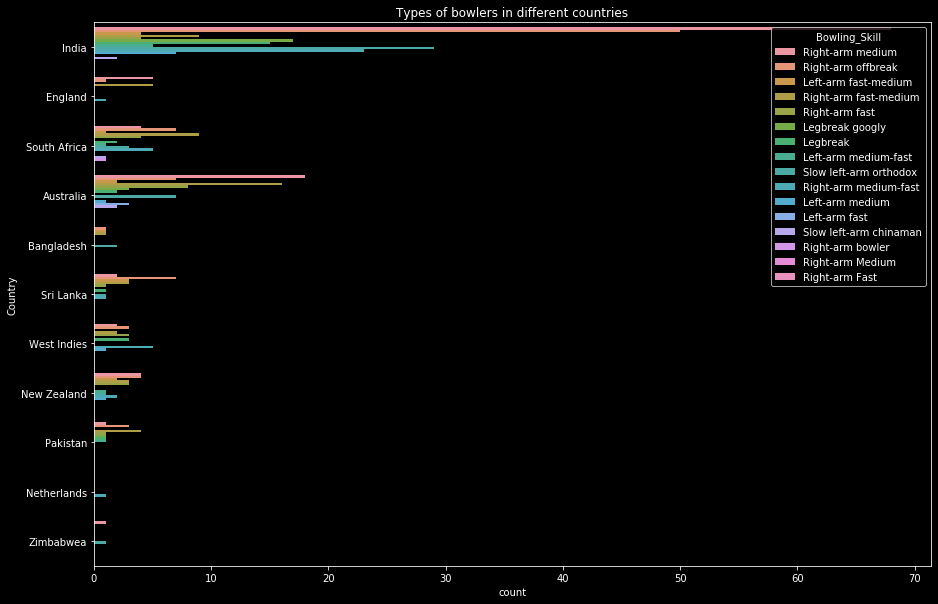

In [14]:
plt.figure(figsize=[15,10])
sns.countplot(y='Country' ,hue='Bowling_Skill', data=Players_data )
plt.title('Types of bowlers in different countries')

<h3>Observations:</h3>
<ul>  
    <li>In India maximum bowlers having bowling skill right arm medium.</li>
    <li>England having equal count of bowlers having bowling skills Right arm medium and Right arm fast medium.</li>
    <li>In Netherland there are only left arm medium bowlers.</li>
</ul>

# <h2>Teamwise Home and Away dataset:-</h2>

In [15]:
home_away_data.head()

,team,home_wins,away_wins,home_matches,away_matches,home_win_percentage,away_win_percentage
0,Rising Pune Supergiant,5,5,8,8,62.500000,62.500000
1,Mumbai Indians,58,51,101,86,57.425743,59.302326
2,Chennai Super Kings,51,49,89,75,57.303371,65.333333
3,Delhi Capitals,3,7,6,10,50.000000,70.000000
4,Sunrisers Hyderabad,30,28,63,45,47.619048,62.222222


<h4>Comaprision of Team won by playing home matches and away matches</h4>

Text(0.5, 1.0, 'Matches played and won away from home')

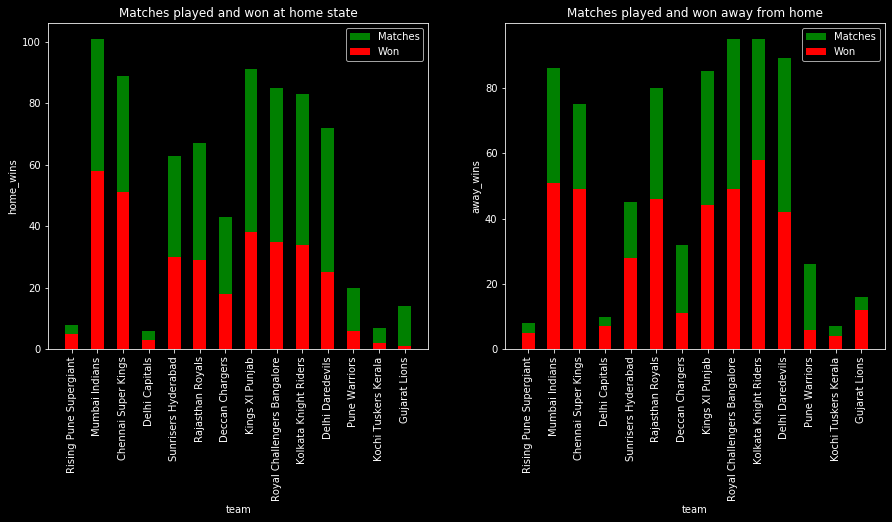

In [16]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.bar(home_away_data['team'],home_away_data['home_matches'],label='Matches',color='g',width=.5)
plt.bar(home_away_data['team'],home_away_data['home_wins'],label='Won',color='r',width=.5)
plt.legend()
plt.xlabel('team')
plt.ylabel('home_wins')
plt.xticks(rotation=90)
plt.title('Matches played and won at home state')

plt.subplot(1,2,2)
plt.bar(home_away_data['team'],home_away_data['away_matches'],label='Matches',color='g',width=.5)
plt.bar(home_away_data['team'],home_away_data['away_wins'],label='Won',color='r',width=.5)
plt.legend()
plt.xlabel('team')
plt.ylabel('away_wins')
plt.xticks(rotation=90)
plt.title('Matches played and won away from home')

<h3>Observations:</h3>
<ul>  
    <li>Mumbai Indians, won the max number of matches at home state but king XI Punjab played the most.</li>
    <li>Kolkata Knight Riders won max number of match away from home state but Delhi Daredevils played the most.</li>
    
</ul>

<h4>To fine team which has max and min percentage of winning at home and away matches </h4>

Text(0.5, 1.0, 'Percentage of winning at away matches')

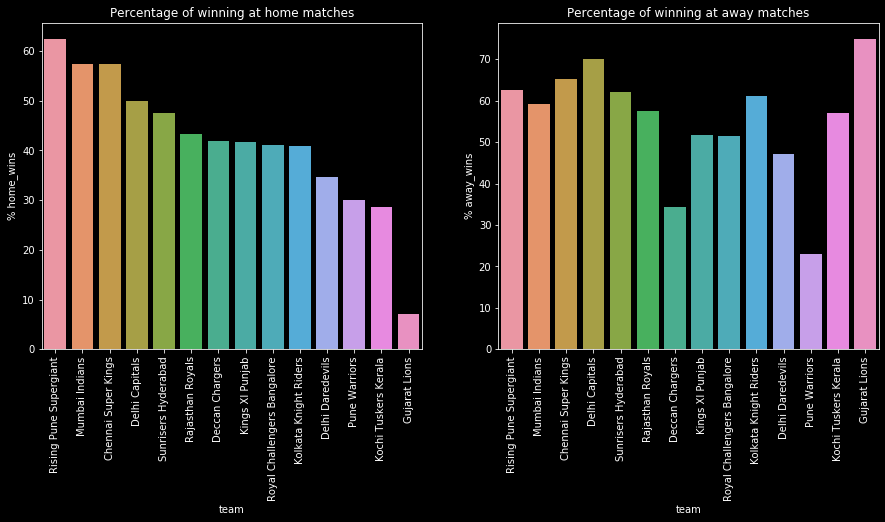

In [17]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.barplot(x='team',y='home_win_percentage',data=home_away_data)
plt.xlabel('team')
plt.ylabel('% home_wins')
plt.xticks(rotation=90)
plt.title('Percentage of winning at home matches')

plt.subplot(1,2,2)
sns.barplot(x='team',y='away_win_percentage',data=home_away_data)
plt.xlabel('team')
plt.ylabel('% away_wins')
plt.xticks(rotation=90)
plt.title('Percentage of winning at away matches')

<h3>Observations:</h3>
<ul>  
    <li>Rising Pune Supergiant have max Percentage of winning at home matches.</li>
    <li>Gujrat Lions have max Percentage of winning at away matches.</li>
</ul>

# <h2>Most run average strikerate dataset:-</h2>

In [18]:
runs_data.head()

,batsman,total_runs,out,numberofballs,average,strikerate
0,V Kohli,5426,152,4111,35.697368,131.987351
1,SK Raina,5386,160,3916,33.662500,137.538304
2,RG Sharma,4902,161,3742,30.447205,130.999466
3,DA Warner,4717,114,3292,41.377193,143.286756
4,S Dhawan,4601,137,3665,33.583942,125.538881


<h4>ORANGE CAP </h4>
<h4>batsman with max runs</h4>

Text(0.5, 1.0, 'batsman with max runs')

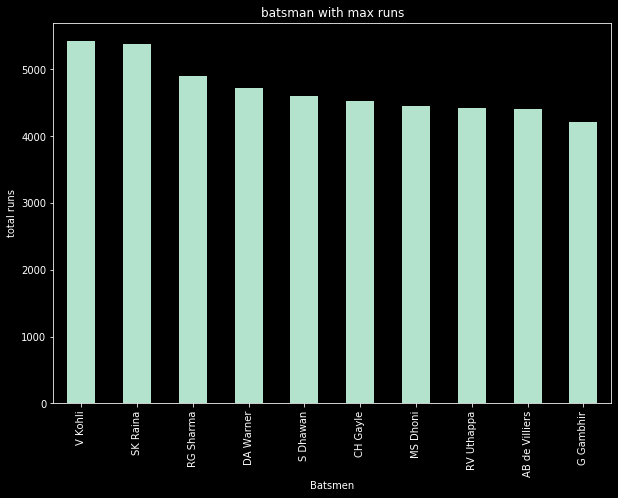

In [68]:
#orange cap- best batsman
plt.figure(figsize=(10,7))
maximum_runs = runs_data.groupby(['batsman'])['total_runs'].sum()
maximum_runs
maximum_runs.sort_values(ascending = False, inplace=True)
maximum_runs[:10].plot(x= 'batsman', y = 'runs', kind = 'bar', colormap = 'Pastel2')
plt.xlabel('Batsmen')
plt.ylabel('total runs')
plt.title('batsman with max runs')


<h3>Observations:</h3>
<ul>  
    <li>V kohli is the batsman with max run throughout the tournament between 2008-17 # orange cap</li>
    
</ul>

<h4>To find batsman with max number of balls</h4>

Text(0.5, 1.0, 'Batsman who got max numberofballs')

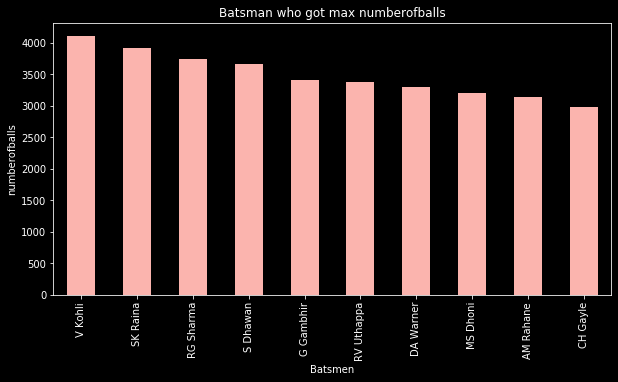

In [29]:
plt.figure(figsize=(10,5))
maximum_runs = runs_data.groupby(['batsman'])['numberofballs'].sum()
maximum_runs
maximum_runs.sort_values(ascending = False, inplace=True)
maximum_runs[:10].plot(x= 'batsman', y = 'numberofballs', kind = 'bar', colormap = 'Pastel1')
plt.xlabel('Batsmen')
plt.ylabel('numberofballs')
plt.title('Batsman who got max numberofballs')


<h3>Observations:</h3>
<ul>  
    <li>V kohli is the batsman with max numberofballs followed by SK Raina throughout the tournament between 2008-17.</li>
    
</ul>

<h4>To find batsman with max Average</h4>

Text(0.5, 1.0, 'max average')

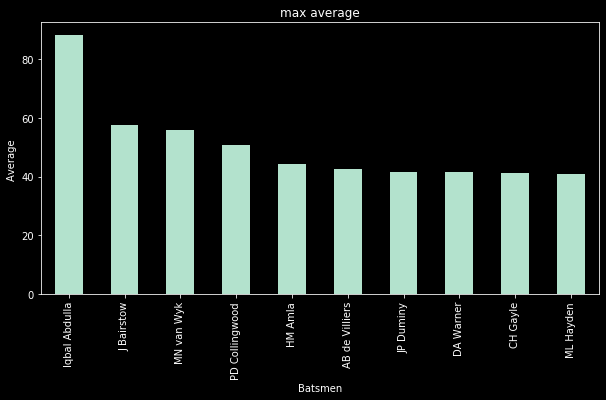

In [65]:
plt.figure(figsize=(10,5))
maximum_runs = runs_data.groupby(['batsman'])['average'].sum()
maximum_runs
maximum_runs.sort_values(ascending = False, inplace=True)
maximum_runs[:10].plot(x= 'batsman', y = 'average', kind = 'bar', colormap = 'Pastel2')
plt.xlabel('Batsmen')
plt.ylabel('Average ')
plt.title('max average')

<h3>Observations:</h3>
<ul>  
    <li>Iqbal is the batsman with max average throughout the tournament between 2008-17.</li>
    
</ul>

<h4>To find batsman with max strikerate</h4>

Text(0.5, 1.0, 'max strikerate')

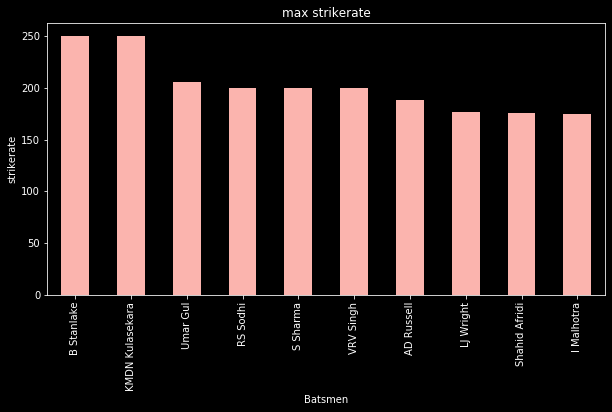

In [64]:
plt.figure(figsize=(10,5))
maximum_runs = runs_data.groupby(['batsman'])['strikerate'].sum()
maximum_runs
maximum_runs.sort_values(ascending = False, inplace=True)
maximum_runs[:10].plot(x= 'batsman', y = 'strikerate', kind = 'bar', colormap = 'Pastel1')
plt.xlabel('Batsmen')
plt.ylabel('strikerate')
plt.title('max strikerate')

<h3>Observations:</h3>
<ul>  
    <li>B Stanlake is the batsman with max strikerate throughout the tournament between 2008-17.</li>
    
</ul>

<h4>To find the average runs of batsman </h4>

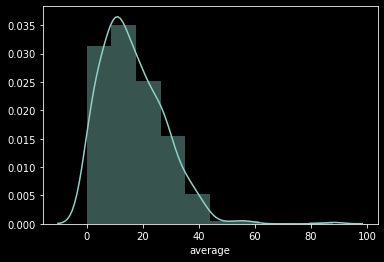

In [22]:
sns.distplot(runs_data['average'],bins=10)

<h3>Observations:</h3>
<ul>  
    <li>This plot shows that average run rate of a player lies between 0-30</li>
    <li>The most average run rate of a player 10-20</li>
</ul>

# <h2>Matches dataset:-</h2>

In [160]:
match_data.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [10]:
match_data.describe()

,id,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,0.025132,13.283069,3.350529
std,3464.478148,0.156630,23.471144,3.387963
min,1.000000,0.000000,0.000000,0.000000
25%,189.750000,0.000000,0.000000,0.000000
50%,378.500000,0.000000,0.000000,4.000000
75%,567.250000,0.000000,19.000000,6.000000
max,11415.000000,1.000000,146.000000,10.000000


In [58]:
#missing value handling
match_data.drop(['umpire3'],axis=1,inplace=True)  #since all the values are NaN

In [56]:
#total venues and total umpire 1 in ipl matches
print('Total venues played at:',match_data['city'].nunique())
print('\nTotal umpires ',match_data['umpire1'].nunique())

Total venues played at: 32

Total umpires  61


In [52]:
#highest no. of match won
print((match_data['player_of_match'].value_counts()).idxmax(),' : has most man of the match awards')
print(((match_data['winner']).value_counts()).idxmax(),': has the highest number of match wins')

CH Gayle  : has most man of the match awards
Mumbai Indians : has the highest number of match wins


<h4>To find type of Result of matches played in ipl </h4>

In [25]:
match_data['result'].value_counts()

normal       743
tie            9
no result      4
Name: result, dtype: int64

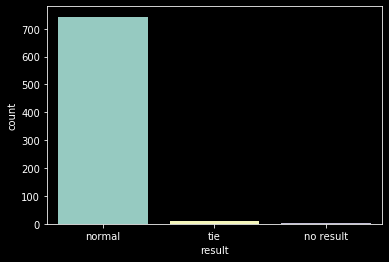

In [23]:
sns.countplot(match_data['result'])

<h4>Conclusion:-</h4>
<ul>
    <li>Maximum result of the matches are normal means there is winner team.</li>
    <li>Very few matches were tie between two teams and super overs took place.</li>
    <li>4 matches have no result.</li>
</ul>

<h4>To find which team won max number of matches overall  </h4>

Text(0.5, 1.0, 'which team won max number of matches overall ')

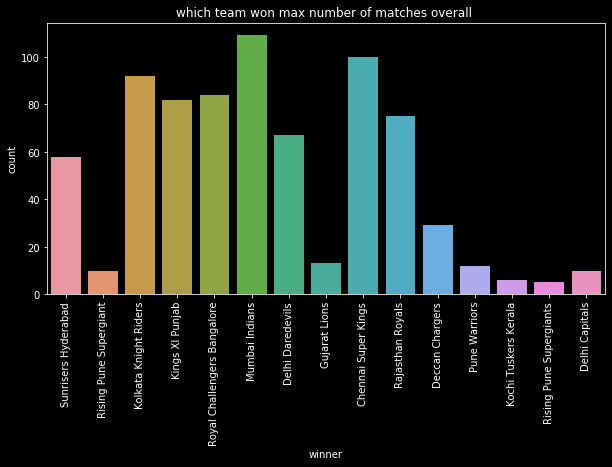

In [9]:
plt.figure(figsize=[10,5])
plt.xticks(rotation=90)
sns.countplot(x='winner', data=match_data )
plt.title('which team won max number of matches overall ')


<h4>Conclusion:-</h4>
<ul>
    <li>Mumbai Indians won max matches throughtout.</li>
    <li>Rising Pune Supergiants won the least.</li>
</ul>

<h4>To find season which had max number of matches  </h4>

Text(0.5, 1.0, 'season which had max number of matches ')

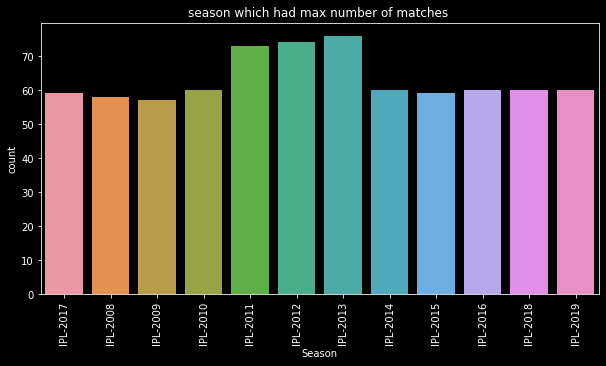

In [6]:
plt.figure(figsize=[10,5])
plt.xticks(rotation=90)
sns.countplot(x='Season', data=match_data )
plt.title('season which had max number of matches ')


<h4>Conclusion:-</h4>
<ul>
    <li>In 2013, max number of matches were conducted.</li>
    <li>In 2009, min number of matches were conducted.</li>
</ul>

<h4>To find team who won max no. of toss  </h4>

Text(0.5, 1.0, 'team who won max tosses ')

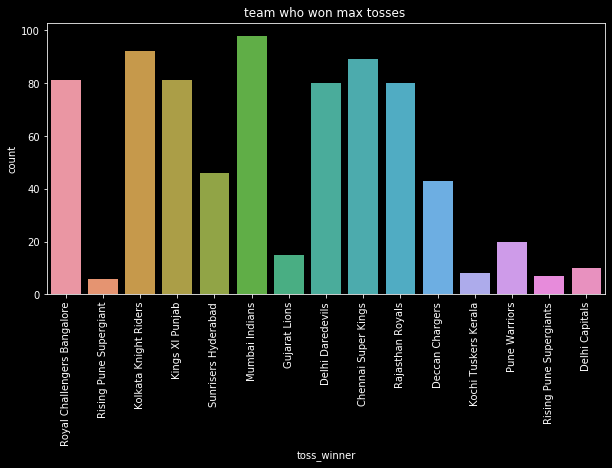

In [51]:
plt.figure(figsize=[10,5])
plt.xticks(rotation=90)
sns.countplot(x='toss_winner', data=match_data )
plt.title('team who won max tosses ')

<h4>Conclusion:-</h4>
<ul>
    <li>Mumbai Indians won max toss.</li>
    <li>Rising Pune Supergiants won the least.</li>
</ul>

<h4>To find whether toss winner is also the match winner </h4>

In [15]:
proabability_of_win=match_data['toss_winner']==match_data['winner']
proabability_of_win.groupby(proabability_of_win).size()

False    363
True     393
dtype: int64

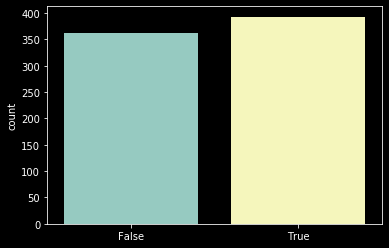

In [18]:
sns.countplot(proabability_of_win)
#Thus the toss winner is not necessarily the match winner. The match winning probablity for toss winning team is about 50%-50%

<h3>Observations:</h3>
<ul>  
    <li>The team who wins the toss doesnot always wins the match, it is 50-50% , therefore win  doesnot depends that much on toss.</li>
    
</ul>

<h4>To find max used venue ground</h4>

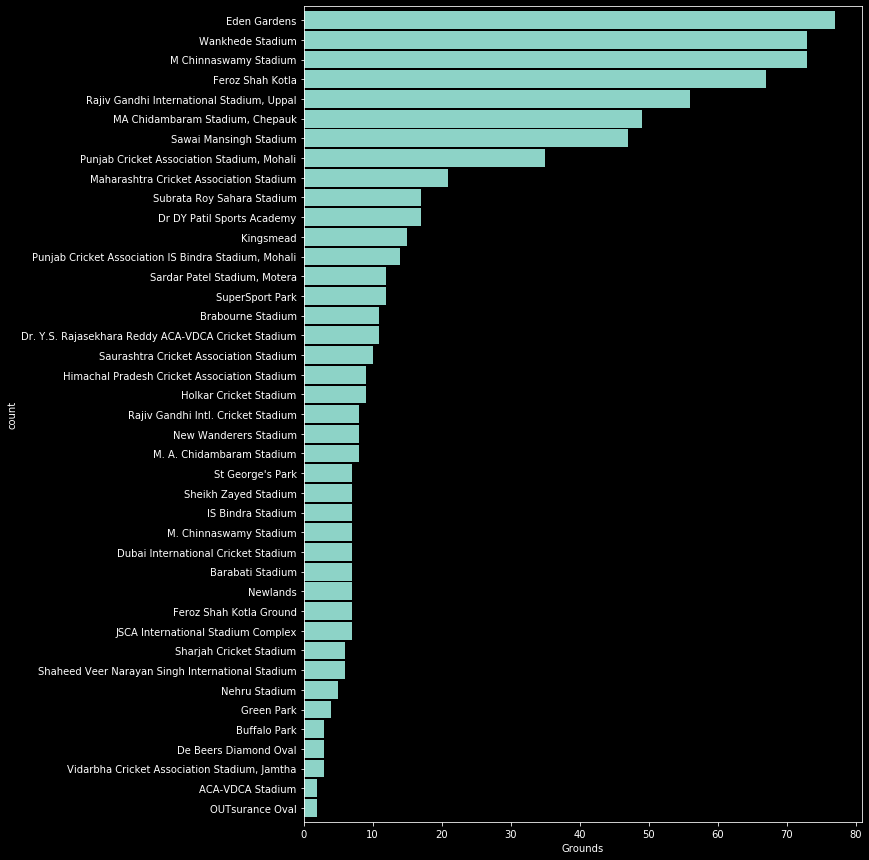

In [31]:
plt.subplots(figsize=(10,15))
ax = match_data ['venue'].value_counts().sort_values(ascending=True).plot.barh(width=.9)
ax.set_xlabel('Grounds')
ax.set_ylabel('count')
plt.show()


<h3>Observations:</h3>
<ul>  
    <li>Max number of matches were held at Eden Gardens Venue throughout the tournament.</li>
    
</ul>

<h4>To find player was man of the match of max number of time</h4>

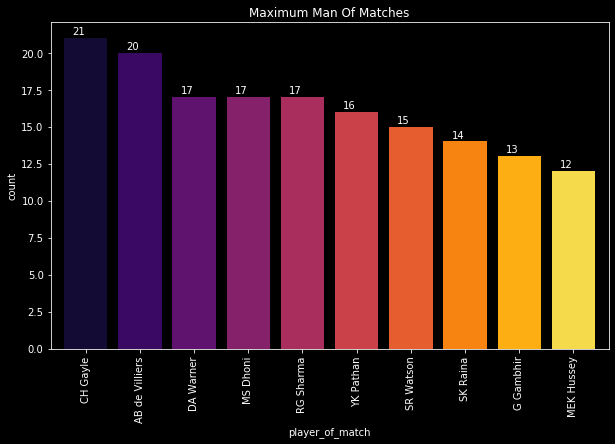

In [37]:
plt.subplots(figsize=(10,6))
ax = match_data['player_of_match'].value_counts().head(10).plot.bar(width=.8, color=sns.color_palette('inferno',10))
#counts the values corresponding to each batsman and then filters out the top 10 batsman and then plots a bargraph 
ax.set_xlabel('player_of_match') 
ax.set_ylabel('count')
plt.title('Maximum Man Of Matches')
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.25))
plt.show()


<h3>Observations:</h3>
<ul>  
    <li>CH Gayle was the Man of the Match for the Maximum number of time followed by AB de Villiers.</li>
    
</ul>

<h4>To find the Best team who won max IPL seasons</h4>

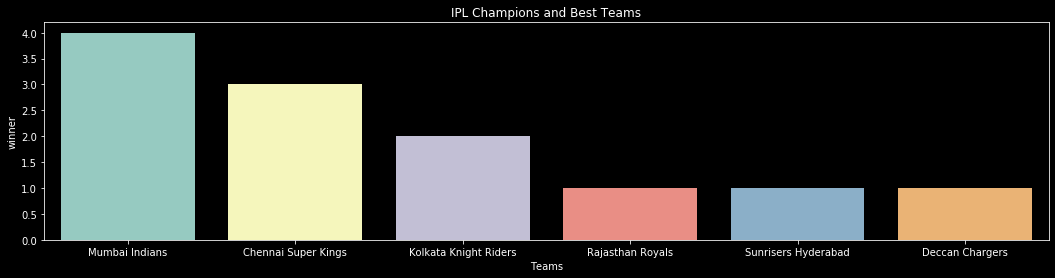

In [7]:
#Best Team
ipl_win = match_data.groupby('Season').tail(1).sort_values('Season', ascending = True)
ipl_winners = ipl_win.winner.value_counts()
plt.figure(figsize=(18, 4))
plt.xlabel('Teams')
plt.ylabel('No. of Times')
plt.title('IPL Champions and Best Teams')
sns.barplot( x  = ipl_winners.index, y = ipl_winners)

<h3>Observations:</h3>
<ul>  
    <li>CH Mumbai Indians has won the max no. of IPL seasons between 2008-17  # best team</li>
    
</ul>

<h4>To find the Team which won by big margin</h4>

In [45]:
big_margin=match_data[(match_data['win_by_runs']>=50) | (match_data['win_by_wickets']>=8)]
big_margin
big_margin.winner.unique()

array(['Kolkata Knight Riders', 'Sunrisers Hyderabad', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Rising Pune Supergiant',
       'Chennai Super Kings', 'Deccan Chargers', 'Rajasthan Royals',
       'Royal Challengers Bangalore', 'Kochi Tuskers Kerala',
       'Rising Pune Supergiants'], dtype=object)

In [46]:
KKR=big_margin[big_margin['winner']=='Kolkata Knight Riders'].count()
MI=big_margin[big_margin['winner']=='Mumbai Indians'].count()
KXP=big_margin[big_margin['winner']=='Kings XI Punjab'].count()
CSK=big_margin[big_margin['winner']=='Chennai Super Kings'].count()
DC=big_margin[big_margin['winner']=='Deccan Chargers'].count()
DD=big_margin[big_margin['winner']=='Delhi Daredevils'].count()
RC=big_margin[big_margin['winner']=='Royal Challengers Bangalore'].count()
KT=big_margin[big_margin['winner']=='Kochi Tuskers Kerala'].count()
SH=big_margin[big_margin['winner']=='Sunrisers Hyderabad'].count()
RPS=big_margin[big_margin['winner']=='Rising Pune Supergiants'].count()
RR=big_margin[big_margin['winner']=='Rajasthan Royals'].count()

In [47]:
KKR_winner=KKR['winner']
MI_winner=MI['winner']
KXP_winner=KXP['winner']
CSK_winner=CSK['winner']
DC_winner=DC['winner']
DD_winner=DD['winner']
RC_winner=RC['winner']
KT_winner=KT['winner']
SH_winner=SH['winner']
RPS_winner=RPS['winner']
RR_winner=RR['winner']

In [48]:
winners=pd.Series([KKR_winner,SH_winner,KXP_winner,RC_winner,DC_winner,DD_winner,CSK_winner,KT_winner,MI_winner,RPS_winner,RR_winner],index=['KKR','SH','KXP','RC','DC','DD','CSK','KT','MI','RPS','RR'])
winners_df=pd.DataFrame(winners,columns=['No. of wins by big margin'])
winners_df

,No. of wins by big margin
KKR,19
SH,10
KXP,13
RC,23
DC,5
DD,17
CSK,24
KT,2
MI,23
RPS,1


([<matplotlib.patches.Wedge at 0x24ebd6f3c88>,
 [Text(1.0326072393018904, 0.3791072267068102, 'KKR'),
  Text(0.7630186153999516, 0.7923399475939231, 'SH'),
  Text(0.46835719928842623, 0.9953097677982979, 'KXP'),
  Text(-0.3399186987098806, 1.0461621663333949, 'RC'),
  Text(-0.9058858541195988, 0.6239958487890808, 'DC'),
  Text(-1.0913261718331657, 0.13786655385541483, 'DD'),
  Text(-0.8205352581832036, -0.7326130561751023, 'CSK'),
  Text(-0.3135211954791309, -1.0543739659083662, 'KT'),
  Text(0.23320779565153882, -1.0749949414054703, 'MI'),
  Text(0.7011663533115138, -0.8475645963487585, 'RPS'),
  Text(1.0011165598370404, -0.45581315647976833, 'RR')],
 [Text(0.5632403123464855, 0.20678576002189644, '11.2%'),
  Text(0.41619197203633723, 0.43218542596032167, '3.2%'),
  Text(0.25546756324823244, 0.5428962369808897, '7.2%'),
  Text(-0.18541019929629848, 0.5706339089091244, '16.8%'),
  Text(-0.49411955679250835, 0.34036137206677125, '4.0%'),
  Text(-0.5952688209999085, 0.07519993846658989, 

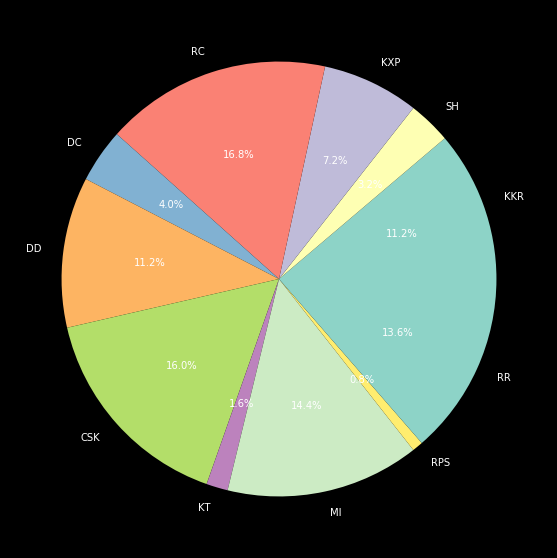

In [49]:
plt.figure(figsize=(10,10))
labels = ['KKR','SH','KXP','RC','DC','DD','CSK','KT','MI','RPS','RR']
sizes = [14, 4, 9, 21, 5, 14 , 20 ,2 ,18 ,1 , 17]
plt.pie(sizes,labels=labels,autopct='%1.1f%%')

<h4>Conclusion:-</h4>
<ul>
<li>This pie chart shows that team Royal Challengers won by big margin of 16.8%</li>
</ul>